In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('food-consumption.csv')

In [73]:
df.head(10)

Country  Real coffee  Instant coffee  Tea  Sweetener  Biscuits  \
0      Germany           90              49   88       19.0      57.0   
1        Italy           82              10   60        2.0      55.0   
2       France           88              42   63        4.0      76.0   
3      Holland           96              62   98       32.0      62.0   
4      Belgium           94              38   48       11.0      74.0   
5   Luxembourg           97              61   86       28.0      79.0   
6      England           27              86   99       22.0      91.0   
7     Portugal           72              26   77        2.0      22.0   
8      Austria           55              31   61       15.0      29.0   
9  Switzerland           73              72   85       25.0      31.0   

   Powder soup  Tin soup  Potatoes  Frozen fish  ...  Apples  Oranges  \
0           51        19        21           27  ...      81       75   
1           41         3         2            4  ...      67       71   
2           53        11        23           11  ...      87       84   
3           67        43         7           14  ...      83       89   
4           37        23         9           13  ...      76       76   
5           73        12         7           26  ...      85       94   
6           55        76        17           20  ...      76       68   
7           34         1         5           20  ...      22       51   
8           33         1         5           15  ...      49       42   
9           69        10        17           19  ...      79       70   

   Tinned fruit  Jam  Garlic  Butter  Margarine  Olive oil  Yoghurt  \
0            44   71      22      91         85         74     30.0   
1             9   46      80      66         24         94      5.0   
2            40   45      88      94         47         36     57.0   
3            61   81      15      31         97         13     53.0   
4            42   57      29      84         80         83     20.0   
5            83   20      91      94         94         84     31.0   
6            89   91      11      95         94         57     11.0   
7             8   16      89      65         78         92      6.0   
8            14   41      51      51         72         28     13.0   
9            46   61      64      82         48         61     48.0   

   Crisp bread  
0           26  
1           18  
2            3  
3           15  
4            5  
5           24  
6           28  
7            9  
8           11  
9           30  

[10 rows x 21 columns]

In [6]:
#Removing countries containing missing data (or NaN)
df = df.dropna(axis =0)

In [80]:
A =np.asarray(df.iloc[:,1:])

In [90]:
#Rescale and normalize dataset by its mean and standard deviation
std = np.std(A)
mean = np.mean(A)
norm_A = (A-mean)/std

In [94]:
mu = np.mean(norm_A, axis=0)

In [95]:
u_norm_A = norm_A-mu

In [99]:
#Compute covariance matrix 
C = np.cov(u_norm_A.T)
C

array([[ 6.35485455e-01, -2.37527363e-01, -1.25940846e-01,
         5.40534433e-02, -5.19833694e-02, -7.05050834e-02,
        -2.06632872e-01,  3.34616554e-02,  1.19819147e-01,
         6.76791601e-02,  1.78005929e-01,  2.56375931e-01,
        -6.21566932e-02, -2.58003391e-01,  2.13387850e-01,
        -1.10762574e-01,  2.27163375e-01,  9.04023071e-02,
         1.99156092e-01,  7.49516567e-02],
       [-2.37527363e-01,  5.65729412e-01,  2.08675708e-01,
         1.18763682e-01,  1.70120581e-01,  2.65970451e-01,
         3.53540026e-01,  5.09891892e-02, -4.96136795e-02,
         3.94403557e-02,  1.81900936e-01,  9.30511846e-02,
         4.67652851e-01,  2.63839092e-01, -1.16448467e-01,
         1.25239472e-01,  1.04382115e-01, -4.22935168e-02,
         2.32794793e-01, -4.06592479e-02],
       [-1.25940846e-01,  2.08675708e-01,  3.01590704e-01,
         1.21528320e-01,  9.83761773e-02,  1.61254673e-01,
         1.82649976e-01,  1.30128660e-02,  7.85742860e-02,
         8.69839613e-02,  4.8

In [100]:
#Compute eigenvalues and eigenvectos of covariance matrix
vals, vecs = np.linalg.eigh(C)
vecs = vecs[:, np.argsort(-vals)]
vals = vals[np.argsort(-vals)]
# Transform features
PCA = vecs[:,0:2]
t_A= np.matmul(PCA.T, u_norm_A.T).T / np.sqrt(vals[0:2])
t_features = np.matmul(u_norm_A, vecs.T)

Text(0, 0.5, 'PC2')

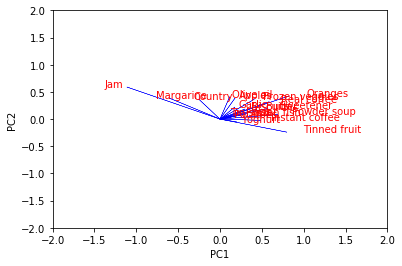

In [101]:
%matplotlib inline
#Plotting 2 principal component directions

directions = np.zeros((t_features.shape[1], 2))
for i in range(t_features.shape[1]):
    directions[i, 0] = vecs[i ,0] * max(t_features[:,0])
    directions[i, 1] = vecs[i ,1] * max(t_features[:,1]) 

for i in range(t_features.shape[1]):
    plt.arrow(0, 0, directions[i, 0], directions[i, 1], color='b', linewidth=0.4)
    plt.text(directions[i, 0] * 1.25, directions[i, 1], df.columns.values[i], color='r')
    
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.xlabel('PC1')
plt.ylabel('PC2')

In [102]:
""" There is no observable pattern in the plot..."""

' There is no observable pattern in the plot...'

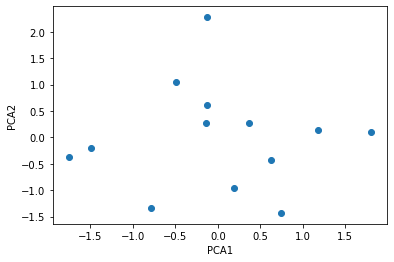

In [103]:
#Plotting transformed dataset
plt.scatter(t_A[:,0], t_A[:,1])
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

In [1]:
""" After performing PCA o dataset, we can observe and relatively easily group data into 2-3 groups without performing clustering algorithms"""

' After performing PCA o dataset, we can observe and relatively easily group data into 2-3 groups without performing clustering algorithms'